In [24]:
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.utils import check_random_state
from FFNN import FFNN


In [25]:
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/20 - Train Loss: 2.0608 - Val Loss: 2.1267
Epoch 2/20 - Train Loss: 1.7331 - Val Loss: 1.8060
Epoch 3/20 - Train Loss: 1.4843 - Val Loss: 1.5619
Epoch 4/20 - Train Loss: 1.2962 - Val Loss: 1.3778
Epoch 5/20 - Train Loss: 1.1494 - Val Loss: 1.2374
Epoch 6/20 - Train Loss: 1.0369 - Val Loss: 1.1306
Epoch 7/20 - Train Loss: 0.9462 - Val Loss: 1.0459
Epoch 8/20 - Train Loss: 0.8716 - Val Loss: 0.9749
Epoch 9/20 - Train Loss: 0.8102 - Val Loss: 0.9185
Epoch 10/20 - Train Loss: 0.7581 - Val Loss: 0.8708
Epoch 11/20 - Train Loss: 0.7134 - Val Loss: 0.8301
Epoch 12/20 - Train Loss: 0.6746 - Val Loss: 0.7955
Epoch 13/20 - Train Loss: 0.6409 - Val Loss: 0.7645
Epoch 14/20 - Train Loss: 0.6112 - Val Loss: 0.7376
Epoch 15/20 - Train Loss: 0.5871 - Val Loss: 0.7180
Epoch 16/20 - Train Loss: 0.5612 - Val Loss: 0.6943
Epoch 17/20 - Train Loss: 0.5389 - Val Loss: 0.6745
Epoch 18/20 - Train Loss: 0.5191 - Val Loss: 0.6568
Epoch 19/20 - Train Loss: 0.5012 - Val Loss: 0.6413
Epoch 20/20 - Train L

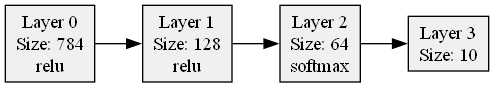

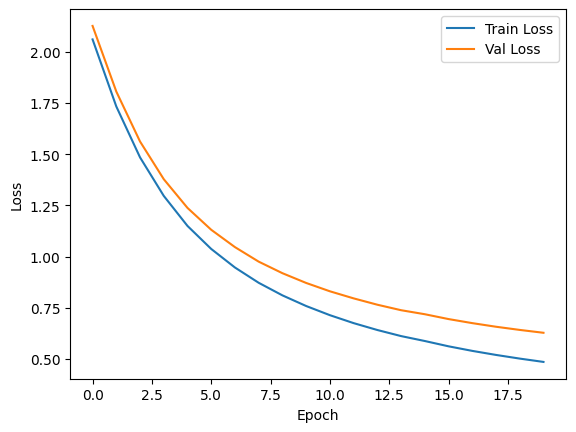

Iteration 1, loss = 1.03491777
Iteration 2, loss = 0.30552232
Iteration 3, loss = 0.18582726
Iteration 4, loss = 0.12375356
Iteration 5, loss = 0.08761302
Iteration 6, loss = 0.06737117
Iteration 7, loss = 0.04881170
Iteration 8, loss = 0.03395350
Iteration 9, loss = 0.02351434
Iteration 10, loss = 0.02080517
Iteration 11, loss = 0.01425244
Iteration 12, loss = 0.01112187
Iteration 13, loss = 0.00851426
Iteration 14, loss = 0.00706818
Iteration 15, loss = 0.00598392
Iteration 16, loss = 0.00494959
Iteration 17, loss = 0.00422107
Iteration 18, loss = 0.00378427
Iteration 19, loss = 0.00323799
Iteration 20, loss = 0.00293353


c:\Users\Jimly\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


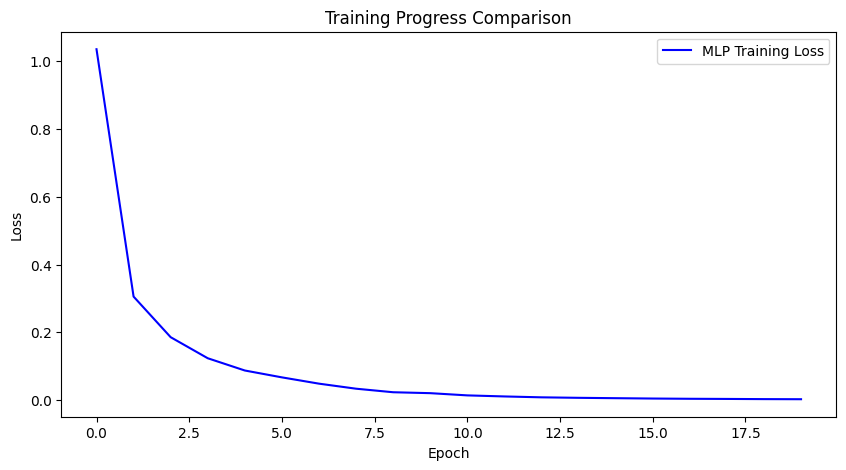

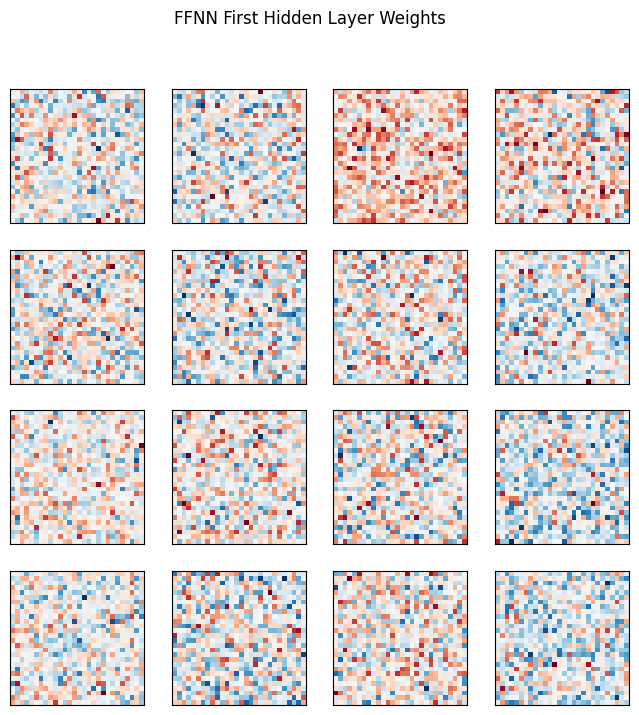


================= Hasil Perbandingan =================
FFNN Test Accuracy: 83.72% | Waktu: 4.68s
MLP Test Accuracy: 93.44% | Waktu: 4.03s


In [ ]:

# 3. Implementasi FFNN Kustom
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_test.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_test,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
ffnn_accuracy = np.mean(test_pred_classes == y_test_int)
# ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0


# 4. Implementasi MLPClassifier
# ==============================
t0 = time.time()
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=128,
    max_iter=20,
    verbose=True,
    random_state=42
)

mlp_clf.fit(X_train, y_train)
mlp_accuracy = mlp_clf.score(X_test, y_test)
mlp_time = time.time() - t0

# 5. Plotting dan Hasil
# ==============================
# Plot akurasi
plt.figure(figsize=(10, 5))
if hasattr(mlp_clf, 'loss_curve_'):
    plt.plot(mlp_clf.loss_curve_, label='MLP Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress Comparison')
plt.legend()
plt.show()

# Plot bobot layer pertama
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    if i < ffnn_model.layers[0].W.shape[1]:
        ax.imshow(ffnn_model.layers[0].W[:, i].reshape(28, 28), cmap='RdBu_r')
        ax.set_xticks(())
        ax.set_yticks(())
plt.suptitle("FFNN First Hidden Layer Weights")
plt.show()

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"FFNN Test Accuracy: {ffnn_accuracy * 100:.2f}% | Waktu: {ffnn_time:.2f}s")
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}% | Waktu: {mlp_time:.2f}s")
print("=======================================================")